In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [59]:
# set configurations
sample_size = 500
nr_sample = 20
x_b = np.linspace(0,1,10)
x_h = np.linspace(0,20,40)

### Bounded distributions

In [60]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [61]:
kde_df = dem.get_kde(bounded_samples, x_b)
kde_df.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,dist
0,0.916544,0.990267,1.041706,1.069664,1.075324,1.061804,1.033423,0.994895,0.950620,0.904224,...,0.955606,1.000522,1.037200,1.059957,1.063789,1.045132,1.002481,0.936718,0.851083,arcsine
1,0.931997,1.015200,1.078888,1.121013,1.141514,1.142099,1.125781,1.096295,1.057529,1.013060,...,0.981037,1.022225,1.054432,1.073852,1.076831,1.060422,1.022943,0.964425,0.886817,arcsine
2,0.856801,0.944873,1.015825,1.066609,1.095974,1.104460,1.094145,1.068234,1.030579,0.985211,...,0.958106,1.006307,1.049467,1.082251,1.099117,1.095204,1.067233,1.014215,0.937792,arcsine
3,0.919727,0.996582,1.051454,1.082194,1.088934,1.073896,1.040897,0.994687,0.940270,0.882325,...,1.002191,1.046456,1.083356,1.108018,1.115751,1.102758,1.066801,1.007703,0.927540,arcsine
4,0.992079,1.080229,1.145500,1.185607,1.200615,1.192654,1.165375,1.123279,1.071097,1.013295,...,0.878706,0.901785,0.918678,0.926033,0.920628,0.899839,0.862121,0.807412,0.737331,arcsine


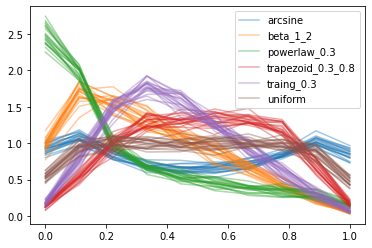

In [57]:
dem.get_kde_plot(kde_df,x_b)

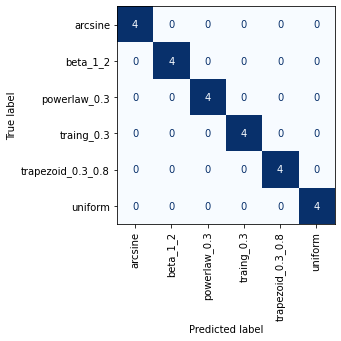

array([1., 1., 1., 1., 1.])

In [58]:
test_size = 0.2
cv = 5
cm.svm_model(kde_df, test_size, cv, plot=1)

In [31]:
def cv_num_steps_sample_size(sample_size_list, nr_moments_list, dists):
    acc = list()
    for i in sample_size_list:
        samples = dm.get_samples(dists, nr_sample, i)
        acc_ = [] 

        for j in num_steps_list:
            x = np.linspace(0,1,j)
            df = dem.get_kde(samples, x)
            score = cm.svm_model(df, test_size, cv)
            acc_.append(score.mean())

        acc.append(acc_)
    return acc

In [34]:
sample_size_list = [5, 10, 25, 50, 100, 150, 200, 500, 750, 1000]
num_steps_list = list(np.arange(5,200,5))
acc = cv_num_steps_sample_size(sample_size_list, num_steps_list, bounded_dists)

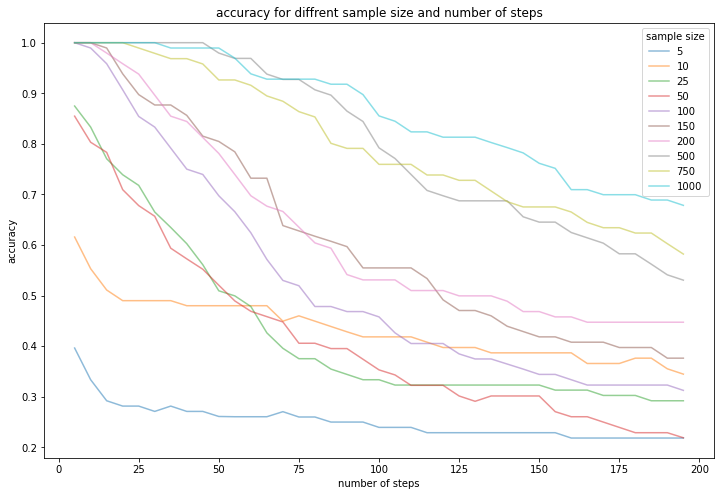

In [35]:
plt.figure(figsize=(12, 8))
for i in range(len(acc)):
    plt.plot(num_steps_list, acc[i], label=str(sample_size_list[i]), alpha = 0.5)
    plt.title('accuracy for diffrent sample size and number of steps')
    plt.xlabel('number of steps')
    plt.ylabel('accuracy')
    plt.legend(title='sample size')
    #plt.xticks(np.arange(min(num_steps_list), max(num_steps_list)+1, 1.0))
plt.show()

In [12]:
# testing number of intervals vs accuracy
acc_mean = []
acc_std = []
intervals = list(range(10,200,5))

for i in intervals:
    x = np.linspace(0,1,i)
    kde_df = dem.get_kde(bounded_dists, nr_sample, sample_size, x)
    score = cm.svm_model(kde_df, test_size, cv)
    acc_mean.append(score.mean())
    acc_std.append(score.std())

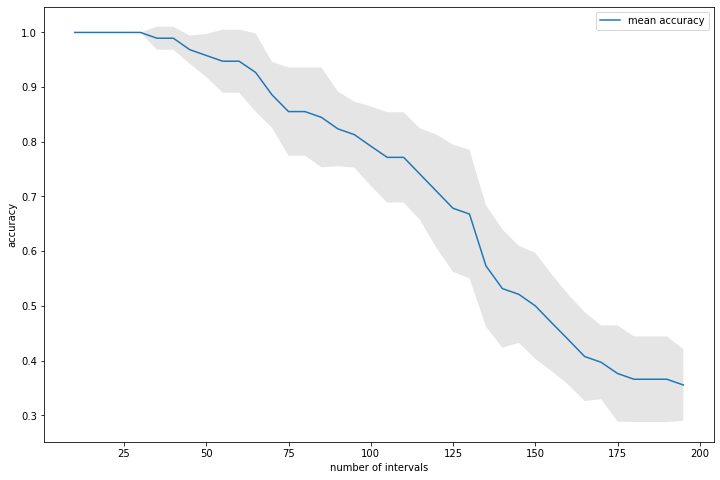

In [13]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(intervals,acc_mean, label='mean accuracy')

plt.gca().fill_between(intervals,
                       [i-j for i,j in zip(acc_mean, acc_std)], 
                       [i+j for i,j in zip(acc_mean, acc_std)],
                       facecolor='gray', 
                       alpha=0.2)

plt.xlabel('number of intervals')
plt.ylabel('accuracy')
plt.legend();

### Heavytail distributions

In [36]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(heavytail_samples)

In [37]:
kde_df = dem.get_kde(heavytail_samples, x_h)
kde_df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,dist
0,0.127659,0.136440,0.139972,0.138024,0.131041,0.120033,0.106347,0.091413,0.076515,0.062638,...,0.001599,0.001665,0.001747,0.001824,0.001874,0.001882,0.001841,0.001752,0.001626,cauchy
1,0.042466,0.042851,0.043093,0.043189,0.043140,0.042947,0.042611,0.042138,0.041531,0.040798,...,0.012698,0.011677,0.010717,0.009816,0.008975,0.008193,0.007467,0.006796,0.006178,cauchy
2,0.089789,0.093121,0.094830,0.094853,0.093220,0.090052,0.085546,0.079957,0.073577,0.066705,...,0.002745,0.002583,0.002462,0.002372,0.002307,0.002257,0.002216,0.002181,0.002146,cauchy
3,0.000493,0.000493,0.000493,0.000493,0.000493,0.000493,0.000493,0.000493,0.000493,0.000493,...,0.000493,0.000493,0.000493,0.000493,0.000493,0.000493,0.000493,0.000493,0.000493,cauchy
4,0.040845,0.041134,0.041297,0.041334,0.041243,0.041028,0.040689,0.040230,0.039656,0.038973,...,0.012956,0.011976,0.011049,0.010177,0.009360,0.008596,0.007886,0.007228,0.006620,cauchy


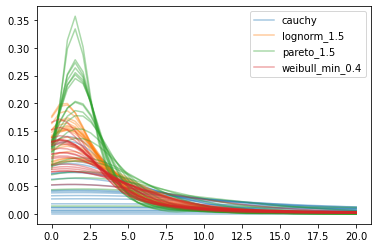

In [38]:
dem.get_kde_plot(kde_df, x_h)

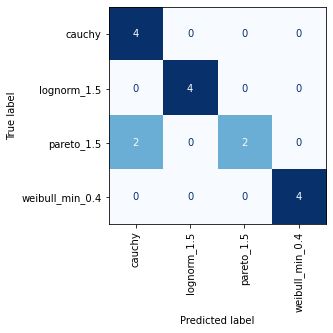

array([0.46153846, 0.84615385, 0.61538462, 0.92307692, 0.66666667])

In [39]:
test_size = 0.2
cv = 5
cm.svm_model(kde_df, test_size, cv, plot=1)

In [40]:
sample_size_list = [5, 10, 25, 50, 100, 150, 200, 500, 750, 1000]
num_steps_list = list(np.arange(5,200,5))
acc = cv_num_steps_sample_size(sample_size_list, num_steps_list, heavytail_dists)

KeyboardInterrupt: 

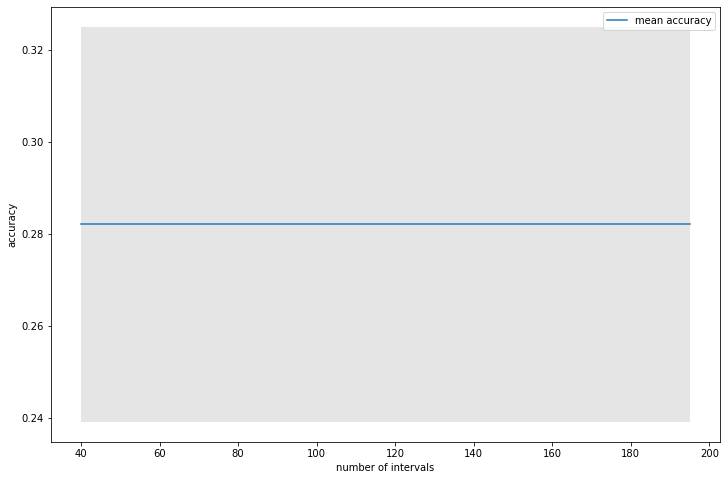

In [142]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(intervals,acc_mean, label='mean accuracy')

plt.gca().fill_between(intervals,
                       [i-j for i,j in zip(acc_mean, acc_std)], 
                       [i+j for i,j in zip(acc_mean, acc_std)],
                       facecolor='gray', 
                       alpha=0.2)

plt.xlabel('number of intervals')
plt.ylabel('accuracy')
plt.legend();

In [186]:
# testing bandwidth vs accuracy
acc_mean = []
acc_std = []
bandwidth = np.linspace(0.000001,0.005,20)
x = np.linspace(0,20,50)
for i in bandwidth:
    kde_df = dem.get_kde_l(longtail_dists, nr_sample, sample_size, x, i)
    score = cm.svm_model(kde_df, test_size, cv)
    acc_mean.append(score.mean())
    acc_std.append(score.std())

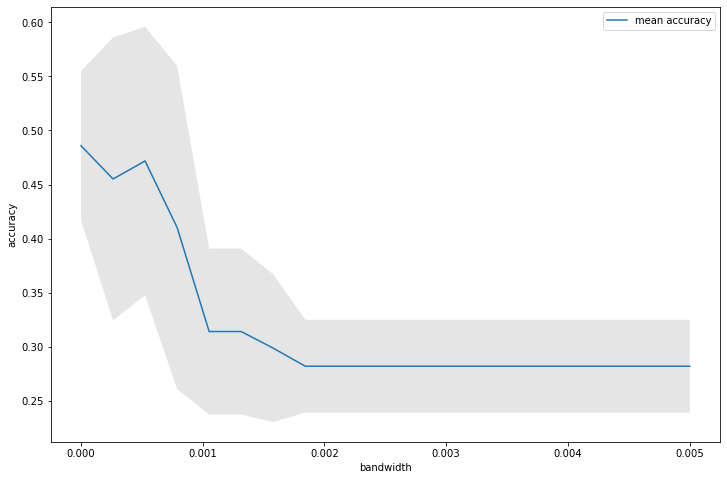

In [187]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(bandwidth,acc_mean, label='mean accuracy')

plt.gca().fill_between(bandwidth,
                       [i-j for i,j in zip(acc_mean, acc_std)], 
                       [i+j for i,j in zip(acc_mean, acc_std)],
                       facecolor='gray', 
                       alpha=0.2)

plt.xlabel('bandwidth')
plt.ylabel('accuracy')
plt.legend();

In [15]:
x = np.linspace(0,20,40)
bandwidth = 0.01
kde_df_l = dem.get_kde_l(longtail_dists, nr_sample, sample_size, x, bandwidth)
kde_df_l.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,dist
0,0.230843,0.906539,0.529108,0.135842,0.085354,0.149828,0.144632,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.14703,0.0,0.0,0.000000,cauchy
1,0.369828,0.705887,0.000000,0.256395,0.132713,0.104094,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,cauchy
2,0.514811,0.470837,0.264222,0.000000,0.132393,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,cauchy
3,0.111593,0.319880,0.294307,0.289939,0.000000,0.132155,0.095933,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,cauchy
4,0.555803,0.475209,0.416877,0.022609,0.000000,0.282759,0.103356,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.087279,cauchy


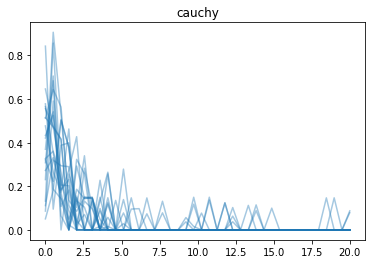

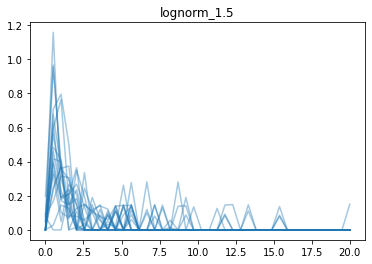

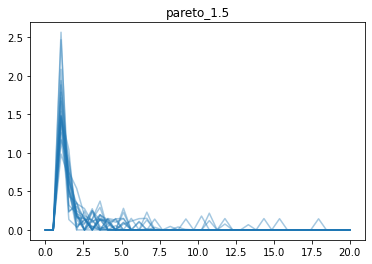

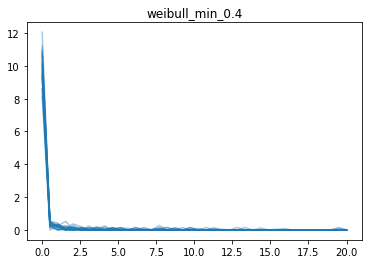

In [16]:
dem.get_kde_plot(longtail_dists, kde_df_l, nr_sample, sample_size, x)

In [17]:
# testing bandwidth vs accuracy
acc_mean = []
acc_std = []
bandwidth = np.linspace(0.00001,0.1,20)
x = np.linspace(0,20,50)
for i in bandwidth:
    kde_df = dem.get_kde_l(longtail_dists, nr_sample, sample_size, x, i)
    score = cm.svm_model(kde_df, test_size, cv)
    acc_mean.append(score.mean())
    acc_std.append(score.std())

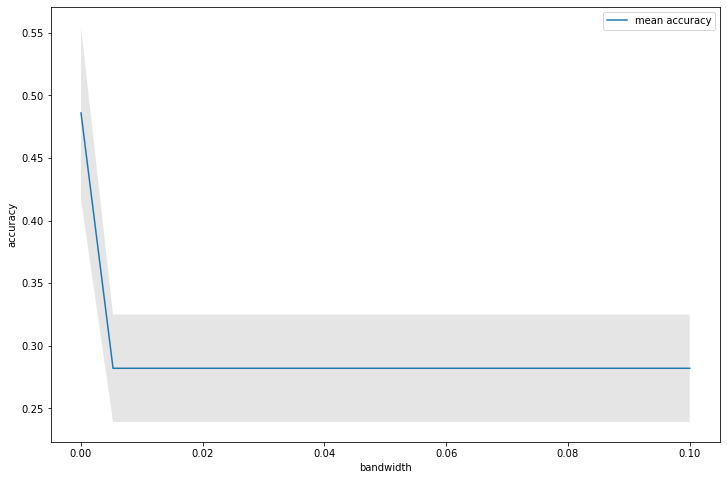

In [18]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(bandwidth,acc_mean, label='mean accuracy')

plt.gca().fill_between(bandwidth,
                       [i-j for i,j in zip(acc_mean, acc_std)], 
                       [i+j for i,j in zip(acc_mean, acc_std)],
                       facecolor='gray', 
                       alpha=0.2)

plt.xlabel('bandwidth')
plt.ylabel('accuracy')
plt.legend();